In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Uncleaned_employees_final_dataset (1).csv to Uncleaned_employees_final_dataset (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Uncleaned_employees_final_dataset (1).csv")


In [ ]:
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB
None


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

education                771
previous_year_rating    1363
dtype: int64


In [ ]:
print(df.describe())

        employee_id  no_of_trainings           age  previous_year_rating  \
count  17417.000000     17417.000000  17417.000000          16054.000000   
mean   39083.491129         1.250732     34.807774              3.345459   
std    22707.024087         0.595692      7.694046              1.265386   
min        3.000000         1.000000     20.000000              1.000000   
25%    19281.000000         1.000000     29.000000              3.000000   
50%    39122.000000         1.000000     33.000000              3.000000   
75%    58838.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       length_of_service  KPIs_met_more_than_80    awards_won  \
count       17417.000000           17417.000000  17417.000000   
mean            5.801860               0.358845      0.023368   
std             4.175533               0.479675      0.151074   
min             1.000000               0.000000      0.

In [ ]:
print(df.columns)


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')


In [ ]:
# Data Cleaning - Example (Modify as needed)
# Convert categorical columns to consistent format
categorical_cols = ['department', 'gender', 'recruitment_channel']  # Updated columns


In [ ]:

df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype(str).str.strip().str.lower())

In [ ]:
# Fill missing values (if any specific strategy is needed, modify here)
df.fillna(method='ffill', inplace=True)

<ipython-input-16-113bd0148dcc>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:

# Save cleaned data for Tableau
cleaned_file_path = 'cleaned_employees_dataset.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to cleaned_employees_dataset.csv


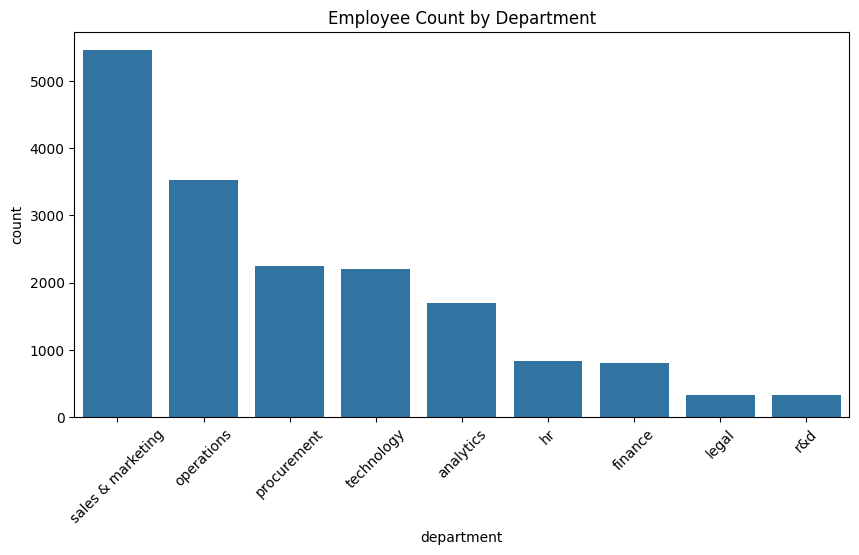

In [ ]:
# Initial EDA - Visualizations
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='department', order=df['department'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Employee Count by Department')
plt.show()

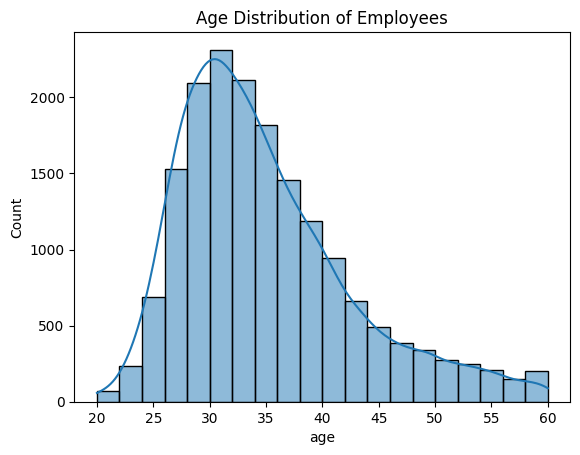

In [ ]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Employees')
plt.show()

In [ ]:
# Save key summaries for Tableau
summary_file_path = 'hr_summary_stats.csv'
df.describe().to_csv(summary_file_path)
print(f"Summary stats saved to {summary_file_path}")

Summary stats saved to hr_summary_stats.csv


In [ ]:
from google.colab import files

# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_employees_dataset.csv', index=False)

# Download the file
files.download('cleaned_employees_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

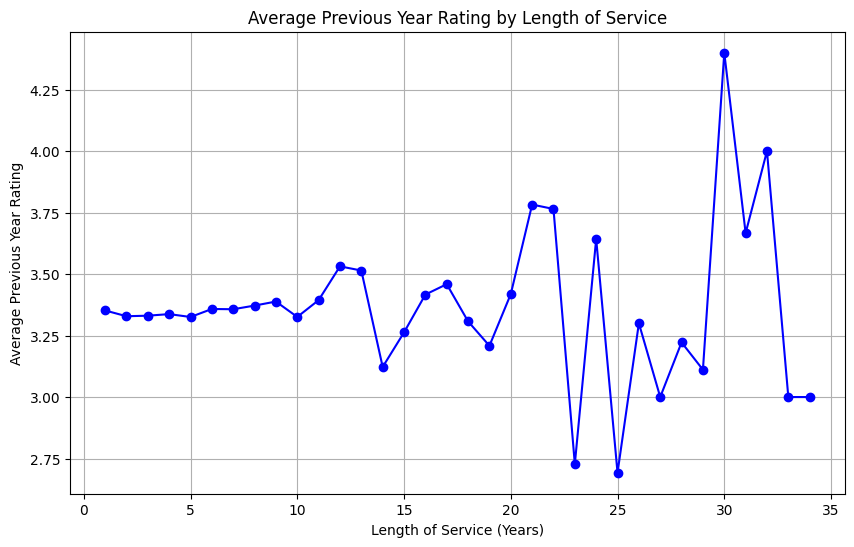

In [ ]:


# Ensure 'previous_year_rating' is numeric (if not already)
df['previous_year_rating'] = pd.to_numeric(df['previous_year_rating'], errors='coerce')

# Extract the 'Year' from the 'length_of_service' or if 'Date_of_Joining' is available, otherwise use the 'length_of_service' to calculate year
# Here, I assume 'length_of_service' represents the number of years the employee has been with the company.

# Calculate average rating by 'length_of_service' or 'Year' (if available)
# For simplicity, we will use 'length_of_service' as an approximation for the year.

avg_rating_by_service = df.groupby('length_of_service')['previous_year_rating'].mean()

# Plot the performance trends over service years
plt.figure(figsize=(10, 6))
avg_rating_by_service.plot(kind='line', marker='o', color='b')
plt.title('Average Previous Year Rating by Length of Service')
plt.xlabel('Length of Service (Years)')
plt.ylabel('Average Previous Year Rating')
plt.grid(True)
plt.show()



In [ ]:
# Calculate some basic statistics
summary_stats = avg_rating_by_service.describe()

# Print summary statistics
print("Performance Trends Summary:")
print(summary_stats)

# If you want to print additional insights based on specific thresholds:
if avg_rating_by_service.max() > 3.5:
    print("\nInsight: Employees with longer service tend to perform better based on the trend.")
else:
    print("\nInsight: Performance appears to be consistent or does not improve significantly with service length.")

Performance Trends Summary:
count    34.000000
mean      3.365295
std       0.325408
min       2.692308
25%       3.232381
50%       3.344613
75%       3.448829
max       4.400000
Name: previous_year_rating, dtype: float64

Insight: Employees with longer service tend to perform better based on the trend.
